# **Disney Plus Movies and TV Shows Catalog**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import wordcloud
from sklearn.impute import SimpleImputer
from datetime import datetime
import seaborn as sns

%matplotlib inline

## Load Dataset

In [2]:
df = pd.read_csv('disney_plus_titles.csv')

In [3]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [53]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_count,rating_num
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,2019-10-01 00:00:00.000000000,1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...,275.0,3.0
1364,s1365,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,2019-10-01 00:00:00.000000000,1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...,60.0,4.0
1365,s1366,TV Show,Disney Kirby Buckets,Unknown,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2020-04-18 08:04:13.186812928,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.,NaN,NaN
1366,s1367,TV Show,Disney Mech-X4,Unknown,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2020-04-18 08:04:13.186812928,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...,NaN,NaN
1367,s1368,TV Show,Imagination Movers,Unknown,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,2020-04-18 08:04:13.186812928,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J...",130.0,1.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1368 non-null   object        
 1   type          1368 non-null   object        
 2   title         1368 non-null   object        
 3   director      1368 non-null   object        
 4   cast          1368 non-null   object        
 5   country       1368 non-null   object        
 6   date_added    1368 non-null   datetime64[ns]
 7   release_year  1368 non-null   int64         
 8   rating        1368 non-null   object        
 9   duration      1368 non-null   object        
 10  listed_in     1368 non-null   object        
 11  description   1368 non-null   object        
 12  rating_count  1154 non-null   float64       
 13  rating_num    1154 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 149.8+ KB


In [6]:
df.describe()

,release_year
count,1368.000000
mean,2002.348684
std,22.127559
min,1928.000000
25%,1998.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [7]:
df.isna().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [8]:
# Handle missing values in Director column
df['director'].fillna('Unknown', inplace=True)

# Handle missing values in Cast column
df['cast'].fillna('Unknown', inplace=True)

# Handle missing values in Country column
df['country'].fillna('Unknown', inplace=True)

# Handle missing values in Date_Added column

# Convert the Date_Added column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Calculate the mean Date_Added
mean_date_added = df['date_added'].mean()

# Impute the missing Date_Added values with the mean Date_Added
df['date_added'].fillna(mean_date_added, inplace=True)

# Handle missing values in Rating column
# Create an imputer with the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer to the rating column and transform it
imputed_rating = imputer.fit_transform(df[['rating']])

# Convert the imputed rating back to a dataframe
imputed_rating_df = pd.DataFrame(imputed_rating, columns=['rating'])

# Replace the original rating column with the imputed rating column
df['rating'] = imputed_rating_df['rating']

In [9]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
import plotly.graph_objects as go

# Count the frequency of each rating
rating_counts = df['rating'].value_counts()

fig = go.Figure(data=[go.Bar(x=rating_counts.index, y=rating_counts.values,)])

fig.update_layout(title='Frequency of Each Rating', title_x=0.5)

fig.show()

In [11]:
unique_ratings = df['rating'].unique()
print(unique_ratings)

['TV-PG' 'G' 'PG-13' 'TV-Y' 'PG' 'TV-G' 'TV-14' 'TV-Y7' 'TV-Y7-FV']


In [12]:
# Count the number of movies for each rating
rating_counts = df['rating'].value_counts(dropna=True)

# Create a dictionary to map ratings to their counts
rating_map = dict(zip(df['rating'], rating_counts))

# Create a new column 'rating_count' with the count of each rating
df['rating_count'] = df['rating'].map(rating_map)

# Sort the dataframe by 'rating_count' in descending order and then by 'title' in ascending order
df_sorted = df.sort_values(by=['rating_count', 'title'], ascending=[False, True])

# Get the top 10 movies
top_10_movies = df_sorted[['title', 'rating']].head(10)

print(top_10_movies)

                                           title rating
634                               101 Dalmatians      G
635  101 Dalmatians II: Patch's London Adventure      G
636                               102 Dalmatians      G
638                 20,000 Leagues Under the Sea      G
639                                 A Bug's Life      G
640                                A Goofy Movie      G
492                       A Tale of Two Critters      G
644                               Aladdin (1992)      G
645              Aladdin and the King of Thieves      G
646                 Aladdin: The Return of Jafar      G


## Distribution of age ratings

In [13]:
# create a list of colors
colors = ['green', 'yellow', 'red', 'purple', 'orange', 'blue']  # add more colors as needed

# create a dictionary to map each unique value to a color
color_map = {rating: color for rating, color in zip(df['rating'].unique(), colors)}

# create the histogram
fig = px.histogram(df, x='rating', color='rating', color_discrete_map=color_map)

# update the layout
fig.update_layout(title='Distribution of age ratings', title_x=0.5)

# show the plot
fig.show()

## Title,Plot,Actors & Directors

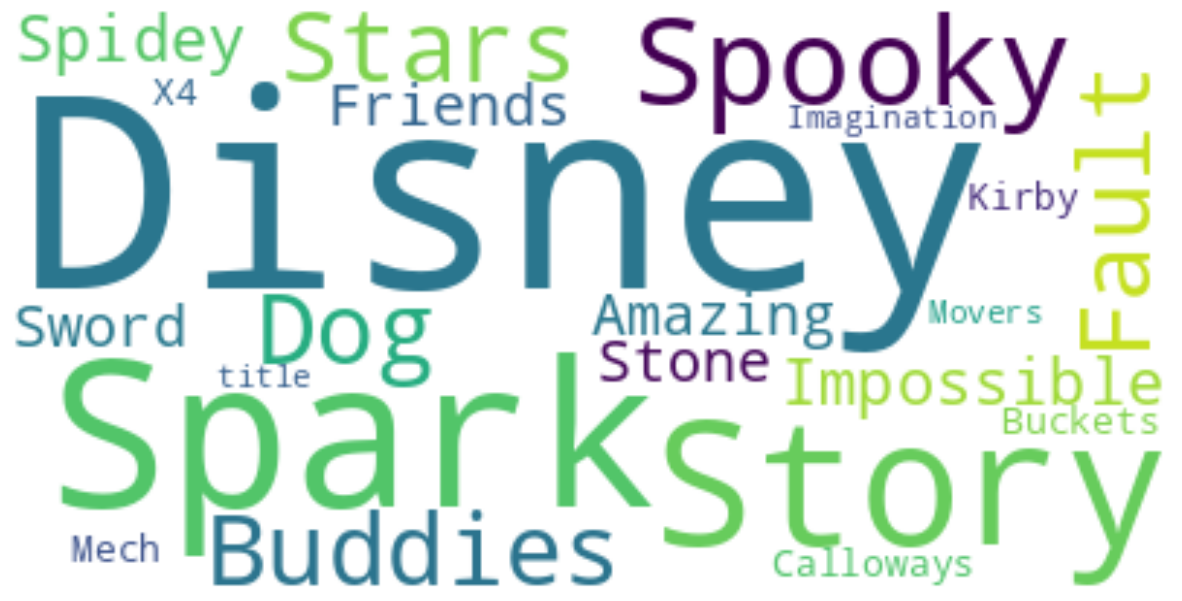

In [14]:
stopwords = ['dtype','Name','object','Length'] + list(STOPWORDS)


genre = wordcloud.WordCloud(max_words=6000,stopwords=stopwords,background_color='white')

genre.generate(str(df['title']))

plt.figure(figsize=(15,15))
plt.imshow(genre,interpolation='bilinear')
plt.axis('off')
plt.show()

## WordCloud of the most frequent words in the Titles


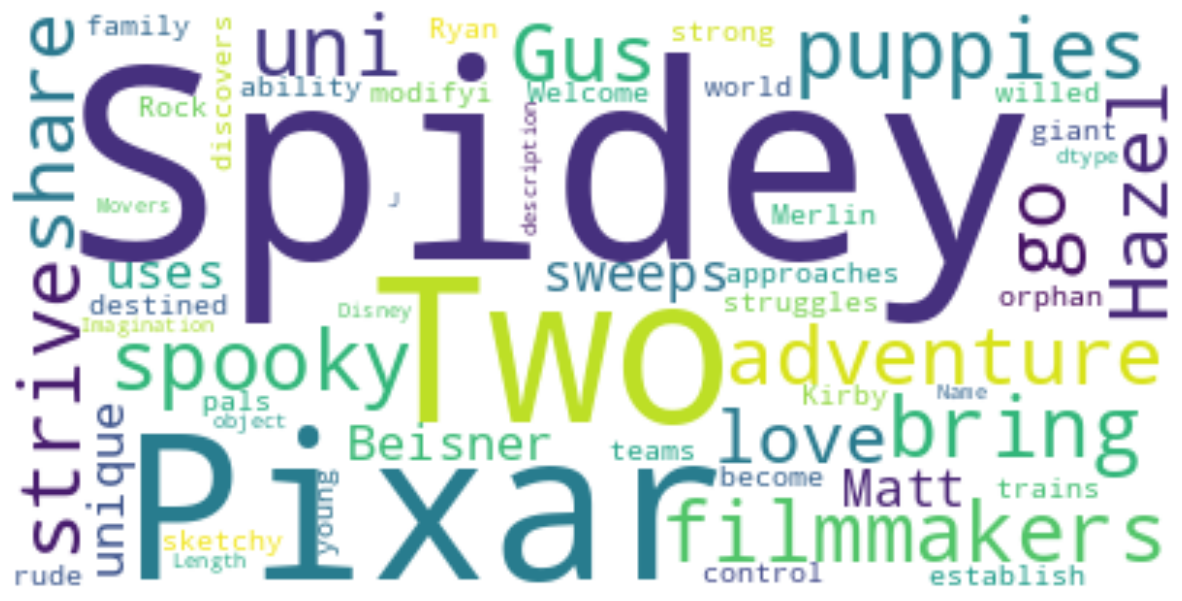

In [15]:
from wordcloud import WordCloud, STOPWORDS

stopwords = ['a', 'an', 'in', 'is', 'of', 'on', 'at', 'with', 'from', 'to', 'the', 'and', 'that', 'this', 'these', 'those', 'for', 'but', 'or', 'not', 'be', 'have', 'had', 'has', 'been', 'being', 'was', 'were', 'will', 'would', 'hall', 'hould', 'can', 'could', 'ay', 'ight', 'ust', 'hall', 'hould', 'will', 'would'] + list(STOPWORDS)

genre = WordCloud(max_words=6000, stopwords=stopwords, background_color='white')

genre.generate(str(df['description']))

plt.figure(figsize=(15,15))
plt.imshow(genre, interpolation='bilinear')
plt.axis('off')
plt.show()

## WordCloud of the most frequent actor names

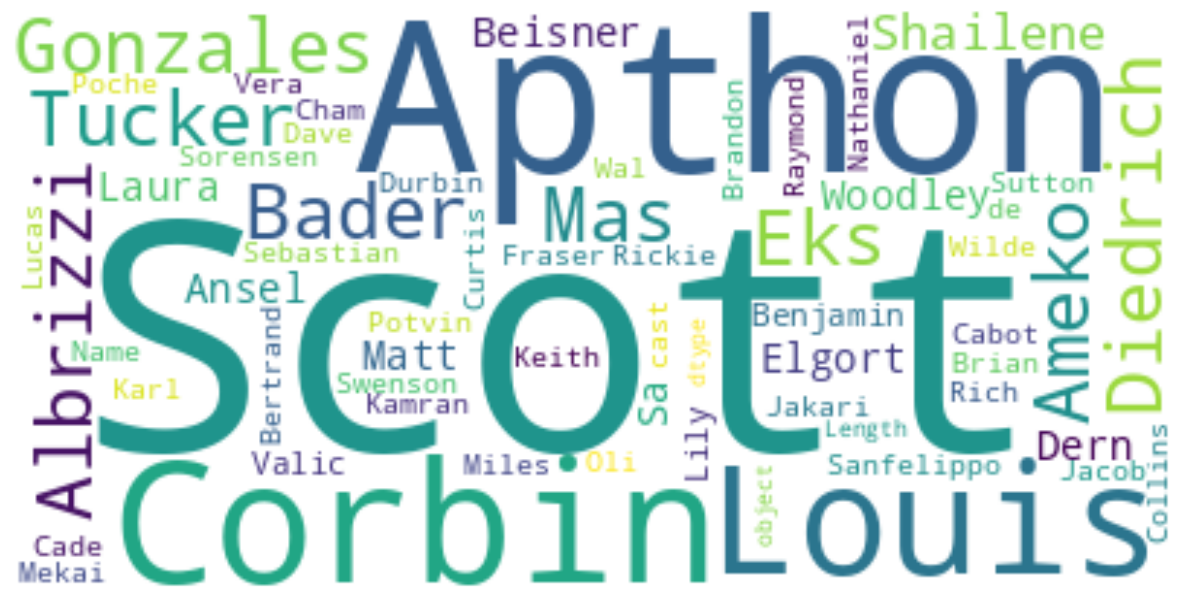

In [16]:
stopwords = set(STOPWORDS)

genre = wordcloud.WordCloud(stopwords=stopwords,background_color='white')

genre.generate(str(df['cast']))

plt.figure(figsize=(15,15))
plt.imshow(genre,interpolation='bilinear')
plt.axis('off')
plt.show()

## WordCloud of the most frequent Director names

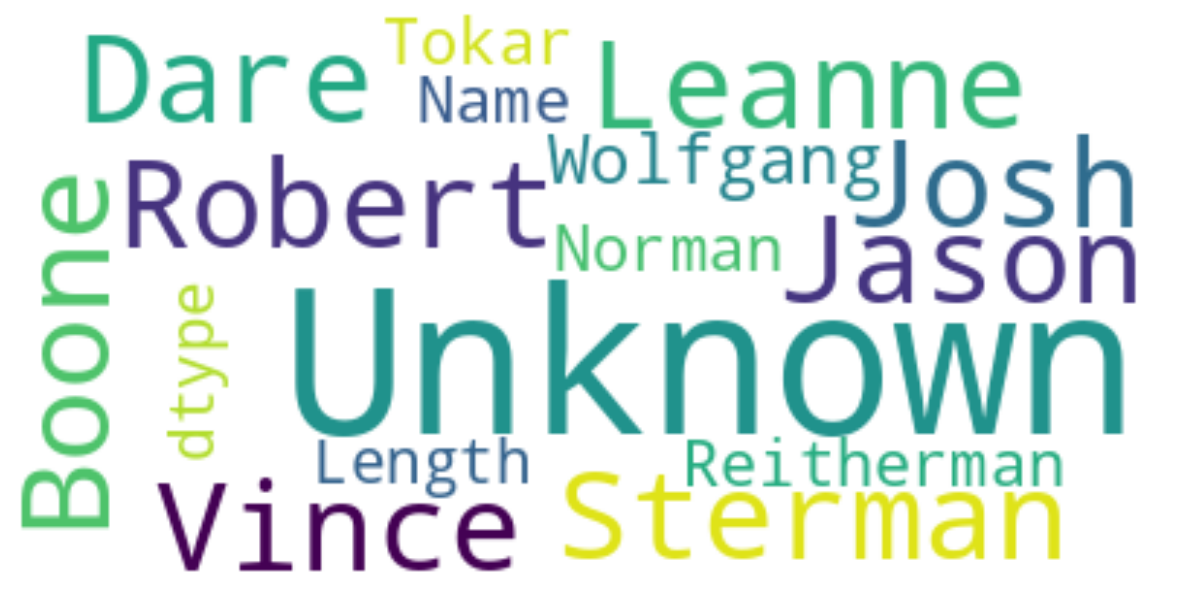

In [17]:
stopwords = ['object','director'] + list(STOPWORDS)

genre = wordcloud.WordCloud(max_words=6000,stopwords=stopwords,background_color='white')

genre.generate(str(df['director']))

plt.figure(figsize=(15,13))
plt.imshow(genre,interpolation='bilinear')
plt.axis('off')
plt.show()

# Genres

## WordCloud of the Genres

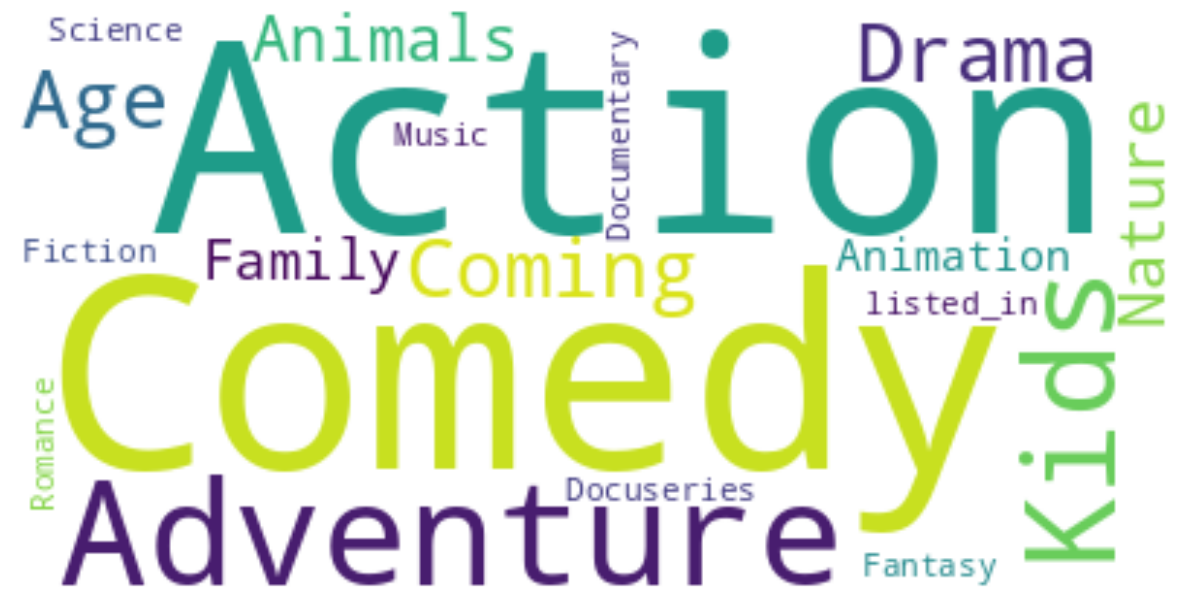

In [18]:
stop_words = ['dtype','Name','object','Length'] + list(STOPWORDS)

genre = wordcloud.WordCloud(max_words=6000,stopwords=stop_words,background_color='white')

genre.generate(str(df['listed_in']))

plt.figure(figsize=(15,15))
plt.imshow(genre,interpolation='bilinear')
plt.axis('off')
plt.show()

## Top 10 Genres

In [19]:
df_genres = df.groupby('listed_in')[['rating']].sum().reset_index().sort_values('rating',ascending=False)
df_genre = df.assign(var1 = df.listed_in.str.split(',')).explode('var1').reset_index(drop = True)

df_genre['splitted'] = df_genre.var1.str.lstrip()

genres = pd.DataFrame(df_genre['splitted'].value_counts()).reset_index(names=['name', 'count']).head(10)

colors = ['#FF69B4', '#32CD32', '#6495ED', '#FFC080', '#8B9467', '#FFA07A', '#C71585', '#7FFF00', '#FF00FF', '#4682B4']

fig = px.bar(genres, x='name', y='count', color=genres['name'], color_discrete_map=dict(zip(genres['name'], colors)))
fig.update_layout(title='Top 10 Genres', title_x=0.5)
fig.show()

## Sum of Ratings per Genre

In [20]:
fig = go.Figure(data=[go.Bar(
            x=df_genres['listed_in'], y=df_genres['rating'],
            text=df_genres['rating'],
            textposition='auto',
            marker=dict(color=np.random.rand(len(df_genres)), colorscale='viridis')
        )])

fig.update_layout(title='Sum of Ratings per Genre',title_x=0.5)
fig.show()

## Top 10 Genres with the highest sum of ratings

In [21]:
fig = go.Figure(data=[go.Bar(
            x=df_genres['listed_in'].head(10), y=df_genres['rating'].head(10),
            text=df_genres['rating'].head(10).astype(str),
            textposition='auto',
        )])

fig.update_layout(title='Top 10 Genres with the highest sum of ratings',title_x=0.5)
fig.show()

## Distribution of show years

In [22]:
fig = px.histogram(df['release_year'],labels={'value':'year'})
fig.update_layout(title='Distribution of show years',title_x=0.5)

## Sum of ratings per year

In [23]:
df_years = df.groupby('release_year')[['rating']].sum().reset_index().sort_values('rating',ascending=False)
fig = px.bar(df_years,x=df_years['release_year'],y=df_years['rating'])
fig.update_layout(title='Sum of ratings per year',title_x=0.5)

## Top 10 ratings with the highest counts

In [24]:
import plotly.express as px

rating_counts = df_years['rating'].value_counts().head(10)

fig = px.pie(values=rating_counts,
             names=rating_counts.index,
             hole=0.5)

fig.update_traces(textposition='inside')

fig.update_layout(title='Top 10 ratings with the highest counts',
                  title_x=0.5)

fig.show()

In [25]:
df_years.head(10)

,release_year,rating
85,2017,TV-YTV-YTV-Y7TV-Y7TV-PGTV-GPGTV-14TV-YTV-PGPGP...
86,2018,TV-YTV-GTV-PGTV-YTV-Y7TV-Y7TV-14TV-GTV-PGTV-PG...
65,1997,TV-YGGPGPGTV-Y7PGGTV-Y7PGGGPGPGTV-GTV-Y7PG
1,1932,TV-Y7TV-Y7TV-G
78,2010,TV-Y7TV-Y7PGPGPGGPG-13TV-PGPGTV-GPGTV-GTV-Y7TV...
22,1953,TV-Y7TV-GTV-GGGTV-G
64,1996,TV-Y7TV-GPGPGGGTV-Y7TV-Y7PGPG-13PGPGGTV-YGTV-G
83,2015,TV-Y7PGTV-Y7PGTV-14TV-Y7TV-Y7TV-14TV-YTV-GGTV-...
62,1994,TV-Y7PGPGPGPGGPGPGTV-Y7TV-Y7TV-Y7PGPG
50,1982,TV-Y7PG


## Top 10 release years with the highest cumulative rating

In [26]:
# Calculate the cumulative rating for each release year
cumulative_ratings = df.groupby('release_year')['rating'].count() * df.groupby('release_year')['rating'].apply(lambda x: x.map({'TV-Y7': 1, 'TV-Y': 2, 'TV-G': 3, 'G': 4, 'PG': 5, 'PG-13': 6, 'R': 7, 'NC-17': 8}).mean())

# Get the top 10 release years with the highest cumulative rating
top_10_years = cumulative_ratings.nlargest(10)

fig = px.pie(values=top_10_years.values,
             names=top_10_years.index,
             hole=0.5,
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_traces(textposition='inside')

fig.update_layout(title='Top 10 release years with the highest cumulative rating',
                  title_x=0.5)

fig.show()

## Box Plot of Duration

In [27]:
fig = px.box(df,y='duration')
fig.update_layout(title='Box Plot of Duration',title_x=0.5)

## Distribution of movie/show runtimes

In [28]:
fig = px.histogram(df['duration'])
fig.update_layout(title='Distribution of movie/show runtimes',title_x=0.5)

## Top 10 movies/shows with the most runtimes

In [29]:
df_duration_top10 = df.sort_values('duration',ascending=False).head(10)
df_duration_top10['duration'] = df_duration_top10['duration'].apply(lambda x:x.replace('min','')).astype(int)

fig = px.bar(df_duration_top10,x=df_duration_top10['title'],y=df_duration_top10['duration'],text=df_duration_top10['duration'])
fig.update_layout(title='Top 10 movies/shows with the most runtimes',title_x=0.5)
fig.show()

## Cumulative Ratings grouped by runtimes

In [30]:
df_duration = df.groupby('duration')[['rating']].sum().reset_index().sort_values('rating',ascending=False)
fig = px.bar(df_duration,x=df_duration['duration'],y=df_duration['rating'],text=df_duration['rating'])
fig.update_layout(title='Cumulative Ratings grouped by runtimes',title_x=0.5)

fig.show()

## Top 10 Runtimes with the highest sum of Ratings

In [31]:
rating_map = {'TV-Y': 1, 'TV-Y7': 2, 'TV-PG': 3, 'TV-14': 4, 'TV-G': 0, 'TV-Y7-FV': 2.5}

df_duration['rating_num'] = df_duration['rating'].map(rating_map)

df_duration_sum = df_duration.groupby('duration')['rating_num'].sum().reset_index()
df_duration_sum = df_duration_sum.sort_values('rating_num', ascending=False).head(10)

fig = px.bar(df_duration_sum, x='duration', y='rating_num', text=[str(round(rating, 2)) for rating in df_duration_sum['rating_num']])
fig.update_layout(title='Top 10 Runtimes with the highest sum of Ratings', title_x=0.5)
fig.show()

## Distribution of show types

In [32]:
color_map = {'type1': 'blue', 'type2': 'ed', 'type3': 'green', 'type4': 'yellow'}
fig = px.histogram(df, x='type', color='type', color_discrete_map=color_map)
fig.update_layout(title='Distribution of show types', title_x=0.5)
fig.show()

## Sum of Ratings per Show Type

In [33]:
# group by 'type' and sum 'rating'
rating_sum_by_type = df.groupby('type')['rating'].sum()

print(rating_sum_by_type)

type
Movie      TV-PGGPG-13PGTV-GTV-GTV-PGTV-PGGTV-PGTV-GPG-13...
TV Show    TV-PGTV-YTV-PGTV-14TV-Y7TV-YTV-14TV-PGTV-YTV-Y...
Name: rating, dtype: object


 Since the 'rating' column contains non-numeric values (e.g., 'TV-PG', 'PG-13'), the sum method concatenates them instead of performing
   a numerical sum. To get a numerical sum, you'll need to map the ratings to numerical values. Here's one way to do that:


In [34]:
# create a rating mapping
rating_map = {'TV-Y': 1, 'TV-G': 2, 'G': 3, 'PG': 4, 'TV-PG': 5, 'PG-13': 6}

# apply the rating mapping
df['rating_num'] = df['rating'].map(rating_map)

# group by 'type' and sum 'rating_num'
rating_sum_by_type = df.groupby('type')['rating_num'].sum()

print(rating_sum_by_type)

type
Movie      3246.0
TV Show     768.0
Name: rating_num, dtype: float64


In [35]:
# group by 'type' and sum 'rating_num'
rating_sum_by_type = df.groupby('type')['rating_num'].sum().reset_index()

# create an interactive bar plot using Plotly Express
fig = px.bar(rating_sum_by_type, x='type', y='rating_num',
             title='Sum of Ratings per Show Type',
             labels={'type': 'Show Type', 'rating_num': 'Sum of Ratings'})

fig.show()

## Sum of Ratings per show types

In [36]:
fig = px.pie(rating_sum_by_type, names='type', values='rating_num')
fig.update_layout(title='Sum of Ratings per show types', title_x=0.5)
fig.show()

## 'date_added' dates with the highest sum of ratings

In [37]:
df_da = df.groupby('date_added')[['rating']].sum().reset_index().sort_values('rating',ascending=False)
fig = px.bar(df_da,df_da['date_added'],df_da['rating'])
fig.update_layout(title='date_added dates with the highest sum of ratings',title_x=0.5)

## Top 10 date_added dates with the highest sum of ratings

In [38]:
fig = px.bar(df_da.head(10),df_da['date_added'].head(10),df_da['rating'].head(10))
fig.update_layout(title='Top 10 added_at dates with the highest sum of ratings',title_x=0.5)

# Let's find the answer of each question

## Question 1: What is the most common rating in the dataset?

In [39]:
rating_counts = df['rating'].value_counts()
px.bar(x=rating_counts.index, y=rating_counts.values, color_discrete_sequence=px.colors.qualitative.Set1,
       title='Most Common Rating', hover_data=[rating_counts.values])

## Question 2: What is the distribution of release years in the dataset?

In [40]:
fig = px.histogram(df, x="release_year", nbins=10, title="Distribution of Release Years")
fig.update_layout(xaxis_title="Release Year", yaxis_title="Frequency")
fig.show()

## Question 3. What is the distribution of content types (Movies vs. TV Shows) in the dataset?

In [41]:
px.pie(df, names='type', title='Content Type Distribution')

## Question 4. Which country has the most content produced?


In [42]:
px.bar(df.groupby('country').size().reset_index(name='count'),
       x='country', y='count', color_discrete_sequence=px.colors.qualitative.Set1,
       title='Country with Most Content Produced')

## Question 5. How many content pieces were added to the dataset in September 2021?


In [43]:
df['date_added'] = pd.to_datetime(df['date_added'])
px.histogram(df, x='date_added', title='Content Added by Month')

## Question 6. What is the average duration of content in the "Kids" genre?

In [44]:
kids_df = df[df['listed_in'].str.contains('Kids')]
durations = kids_df['duration'].str.extract('(\d+) min', expand=False).astype(float)  # convert to float to handle NaN
px.box(durations, title='Average Duration of Content in "Kids" Genre')

## Question 7. Which movies have the most cast members?

In [45]:
# count the number of cast members for each movie
cast_counts = df.groupby('title')['cast'].apply(lambda x: x.str.split(',').apply(len).max()).reset_index()
cast_counts.columns = ['title', 'cast_count']

cast_counts = cast_counts.sort_values('cast_count', ascending=False).head(10)

# create a bar plot
fig = px.bar(cast_counts, x='cast_count', y='title',
             title='Top 10 Movies with the Most Cast Members',
             labels={'cast_count': 'Number of Cast Members', 'title': 'Movie Title'})

fig.show()

## Question 8. What are the top 10 directors with the most movies in the dataset?

In [46]:
df_director = df.assign(var1 = df.director.str.split(',')).explode('var1').reset_index(drop = True)

df_director['splitted'] = df_director.var1.str.lstrip()


df_director = df.assign(director = df.director.str.split(',')).explode('director').reset_index(drop = True)

directors = pd.DataFrame(df_director['director'].value_counts()).reset_index(names=['Director Name', 'Count']).head(10)

fig = px.bar(directors, x='Director Name', y='count')
fig.update_layout(title='Top 10 Directors', title_x=0.5)
fig.show()

### Question 9. What are the top 10 oldest movies in the dataset?

In [47]:
oldest_movies = df.nsmallest(10, 'release_year')[['title', 'release_year']]
print(oldest_movies)

                         title  release_year
1146          Steamboat Willie          1928
662         Babes in the Woods          1932
819          Flowers and Trees          1932
1104          Santa's Workshop          1932
1243            The Pied Piper          1933
1288         Three Little Pigs          1933
1345             Ye Olden Days          1933
848   Grasshopper and the Ants          1934
1180          The Big Bad Wolf          1934
1205     The Goddess of Spring          1934


In [48]:
# create a bar plot
fig = px.bar(oldest_movies, x='title', y='release_year',
             title='10 Oldest Movies',
             labels={'title': 'Movie Title', 'release_year': 'Release Year'})

fig.show()

## Question 10. What are the top 10 newest movies in the dataset?

In [49]:
newest_movies = df.nlargest(10, 'release_year')[['title', 'release_year']]
print(newest_movies)

                              title  release_year
0                     A Spark Story          2021
4    Spidey And His Amazing Friends          2021
5                Star Wars: Visions          2021
7        Descendants: Royal Wedding          2021
9         Flooded Tombs of the Nile          2021
11                             Nona          2021
12      Smoky Mountain Park Rangers          2021
16  Unknown Waters with Jeremy Wade          2021
17       Far Away From Raven’s Home          2021
19                 Twenty Something          2021


In [52]:
# create a bar plot
fig = px.bar(newest_movies, x='title', y='release_year',
             title='10 Newest Movies',
             labels={'title': 'Movie Title', 'release_year': 'Release Year'})

fig.show()